# **Lab1: Regression**
In *lab 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict people's grip force from their weight.
You can use either Matrix Inversion or Gradient Descent.


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict grip force in a different way (for example, with more variables) than the basic part




---
# 1. Basic Part (50%)
In the first part, you need to implement the regression to predict grip force

Please save the prediction result in a CSV file and submit it to Kaggle

### Import Packages

> Note: You **cannot** import any other package


In [1034]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

### Global attributes
Define the global attributes\
You can also add your own global attributes here

In [1035]:
training_dataroot = 'lab1_basic_training.csv' # Training data file file named as 'lab1_basic_training.csv'
testing_dataroot = 'lab1_basic_testing.csv'   # Testing data file named as 'lab1_basic_testing.csv'
output_dataroot = 'lab1_basic.csv' # Output file will be named as 'lab1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be a list with 100 elements

### Load the Input File
First, load the basic input file **lab1_basic_training.csv** and **lab1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

In [1036]:
# Read input csv to datalist
with open(training_dataroot, newline="") as csvfile:
    training_datalist = pd.read_csv(training_dataroot).to_numpy()

with open(testing_dataroot, newline="") as csvfile:
    testing_datalist = pd.read_csv(testing_dataroot).to_numpy()

# --- DEBUG ---
print(training_datalist)
print(testing_datalist)

[[ 55.4      32.8    ]
 [ 53.6      39.4    ]
 [ 78.4      52.6    ]
 ...
 [ 65.3      46.     ]
 [ 62.7     125.68257]
 [ 59.7      38.9    ]]
[[ 53.6 ]
 [ 51.54]
 [ 79.7 ]
 [ 56.68]
 [ 68.5 ]
 [ 64.8 ]
 [ 57.4 ]
 [ 63.5 ]
 [ 63.3 ]
 [ 61.4 ]
 [ 69.9 ]
 [ 92.5 ]
 [ 83.1 ]
 [ 51.3 ]
 [ 64.5 ]
 [ 64.2 ]
 [ 64.8 ]
 [ 57.3 ]
 [ 55.5 ]
 [ 67.4 ]
 [ 84.  ]
 [ 66.4 ]
 [ 84.8 ]
 [ 82.3 ]
 [ 51.4 ]
 [ 91.4 ]
 [ 77.7 ]
 [ 56.4 ]
 [ 66.3 ]
 [ 52.8 ]
 [ 82.9 ]
 [ 68.9 ]
 [ 64.2 ]
 [ 64.1 ]
 [ 76.1 ]
 [ 57.72]
 [ 45.22]
 [ 90.6 ]
 [ 44.1 ]
 [ 60.9 ]
 [ 50.3 ]
 [ 69.  ]
 [ 79.8 ]
 [ 59.6 ]
 [ 51.5 ]
 [ 78.7 ]
 [ 56.4 ]
 [ 53.6 ]
 [ 52.1 ]
 [ 66.4 ]
 [ 75.2 ]
 [ 56.  ]
 [ 60.  ]
 [ 69.1 ]
 [ 62.  ]
 [ 73.5 ]
 [ 59.8 ]
 [ 79.1 ]
 [ 52.9 ]
 [ 85.  ]
 [ 82.6 ]
 [ 48.8 ]
 [ 84.6 ]
 [ 80.4 ]
 [ 73.5 ]
 [ 86.7 ]
 [ 57.8 ]
 [ 49.2 ]
 [ 84.4 ]
 [ 65.5 ]
 [ 89.9 ]
 [ 66.96]
 [ 85.1 ]
 [ 79.7 ]
 [104.9 ]
 [ 54.28]
 [ 56.5 ]
 [ 68.5 ]
 [ 76.92]
 [ 97.  ]
 [ 67.1 ]
 [ 72.5 ]
 [ 63.3 ]
 [ 63.9 ]
 [ 72.8 ]
 [ 65.

### Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions

#### Step 1: Split Data
Split data in *training_datalist* into training dataset and validation dataset


In [1037]:
def SplitData(data, split_ratio):
    """
    Splits the given dataset into training and validation sets based on the specified split ratio.

    Parameters:
    - data (numpy.ndarray): The dataset to be split. It is expected to be a 2D array where each row represents a data point and each column represents a feature.
    - split_ratio (float): The ratio of the data to be used for training. For example, a value of 0.8 means 80% of the data will be used for training and the remaining 20% for validation.

    Returns:
    - training_data (numpy.ndarray): The portion of the dataset used for training.
    - validation_data (numpy.ndarray): The portion of the dataset used for validation.

    """
    training_data = []
    validation_data = []

    # TODO - Done
    data_size = len(data)
    training_data = data[: math.floor(data_size * split_ratio)]
    validation_data = data[math.floor(data_size * split_ratio) :]

    return training_data, validation_data

#### Step 2: Preprocess Data
Handle unreasonable data and missing data

> Hint 1: Outliers and missing data can be addressed by either removing them or replacing them using statistical methods (e.g., the mean of all data).

> Hint 2: Missing data are represented as `np.nan`, so functions like `np.isnan()` can be used to detect them.

> Hint 3: Methods such as the Interquartile Range (IQR) can help detect outliers

In [1038]:
def PreprocessDataBasic(data):
    """
    Preprocess the given dataset and return the result.

    Parameters:
    - data (numpy.ndarray): The dataset to preprocess. It is expected to be a 2D array where each row represents a data point and each column represents a feature.

    Returns:
    - preprocessedData (numpy.ndarray): Preprocessed data.
    """
    preprocessedData = data

    # TODO
    print(f"{preprocessedData=}")

    data_removed_nan = np.array(
        [i for i in preprocessedData if not np.isnan(i[0]) and not np.isnan(i[1])]
    )

    (x_mean, y_mean) = np.mean(data_removed_nan, axis=0).tolist()
    print(f"{(x_mean, y_mean)=}")

    x_q25, x_q50, x_q75 = np.percentile(data_removed_nan[:, 0], [25, 50, 75]).tolist()
    y_q25, y_q50, y_q75 = np.percentile(data_removed_nan[:, 1], [25, 50, 75]).tolist()
    print(f"{(x_q25, x_q75)=}, {(y_q25, y_q75)=}")

    x_iqr = x_q75 - x_q25
    y_iqr = y_q75 - y_q25
    print(f"{x_iqr=}, {y_iqr=}")

    x_ac_range = (x_q25 - 3 * x_iqr, x_q75 + 3 * x_iqr)
    y_ac_range = (y_q25 - 3 * y_iqr, y_q75 + 3 * y_iqr)
    print(f"{x_ac_range=}, {y_ac_range=}")

    for i in preprocessedData:
        # nan value
        if np.isnan(i[0]):
            i[0] = x_mean
        if np.isnan(i[1]):
            i[1] = y_mean

        # extreme outlier
        if not x_ac_range[0] <= i[0] <= x_ac_range[1]:
            i[0] = x_q50
        if not y_ac_range[0] <= i[1] <= y_ac_range[1]:
            i[1] = y_q50

    return preprocessedData

    # res = []
    # for i in preprocessedData:
    #     # nan value
    #     if (
    #         np.isnan(i[0])
    #         or np.isnan(i[1])
    #         or not x_ac_range[0] <= i[0] <= x_ac_range[1]
    #         or not y_ac_range[0] <= i[1] <= y_ac_range[1]
    #     ):
    #         continue

    #     res.append(i)

    # return np.array(res)

### Step 3: Implement Regression
You have to use Gradient Descent to finish this part

In [1039]:
def RegressionBasic(dataset):
    """
    Performs regression on the given dataset and return the coefficients.

    Parameters:
    - dataset (numpy.ndarray): A 2D array where each row represents a data point.

    Returns:
    - w (numpy.ndarray): The coefficients of the regression model. For example, y = w[0] + w[1] * x + w[2] * x^2 + ...
    """

    X = dataset[:, :1]
    y = dataset[:, 1]
    # print(f"{np.sum(y)=}")

    # print(f"{X=}, {y=}")

    # <TODO>: Decide on the degree of the polynomial
    degree = 2  # For example, quadratic regression

    # Add polynomial features to X
    X_poly = np.ones((X.shape[0], 1))  # Add intercept term (column of ones)
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X**d))  # Add x^d terms to feature matrix
    # print(f"{X_poly=}")

    # Initialize coefficients (weights) to zero
    # Number of features (including intercept and polynomial terms)
    num_dimensions = X_poly.shape[1]
    w = np.zeros(num_dimensions)  # shihtl> 這個 w 就是我們要解的東西
    # print(f"{num_dimensions=}, {w=}")

    # <TODO>: Set hyperparameters
    num_iteration = 70_0000
    learning_rate = 0.00000001

    # Gradient Descent
    m = len(y)  # Number of data points
    for iteration in range(2, 2 + num_iteration):
        # learning_rate = 0.001 * (1 / math.log(math.log(iteration, 1.00000001), 1.00000001))
        # print(f"{learning_rate=}")
        # <TODO>: Prediction using current weights and compute error
        # print(f"{X_poly.shape=}, {w.shape=}")
        y_hat = X_poly @ w
        d = y - y_hat
        # print(f"{d=}, {y_hat=}, {len(y)=}")

        # <TODO>: Compute gradient
        g = -2 * ((np.transpose(d) @ X_poly) / m)
        # g = -2 * (np.matmul(np.transpose(d), X_poly))

        # <TODO>: Update the weights
        w = w - learning_rate * g

        # <TODO>: Optionally, print the cost every 100 iterations
        if iteration % 10000 == 0:
            cost = np.sum((y - y_hat) ** 2) / m
            print(f"Iteration {iteration}, Cost: {cost}")
        # cost = np.sum((y - y_hat) ** 2) / len(y)
        # print(f"Iteration {iteration}, Cost: {cost}\n\n")

    return w

### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [1040]:
def MakePredictionBasic(w, test_dataset):
    """
    Predicts the output for a given test dataset using a regression model.

    Parameters:
    - w (numpy.ndarray): The coefficients of the model, where each element corresponds to
                               a coefficient for the respective power of the independent variable.
    - test_dataset (numpy.ndarray): A 1D array containing the input values (independent variable)
                                          for which predictions are to be made.

    Returns:
    - list/numpy.ndarray: A list or 1d array of predicted values corresponding to each input value in the test dataset.
    """
    prediction = []

    # TODO
    for data in test_dataset:
        # prediction.append(w[0] + w[1] * data)
        prediction.append(w[0] + w[1] * data + w[2] * data * data)

    return np.array(prediction)

### Step 5: Train Model and Generate Result

Use the above functions to train your model on training dataset, and predict the answer of testing dataset.

Save your predicted values in `output_datalist`

> Notice: **Remember to inclue the coefficients of your model in the report**



In [1041]:
# TODO

# (1) Split data
training_data, validation_data = SplitData(training_datalist, 0.85)

# (2) Preprocess data
training_data = PreprocessDataBasic(training_data)
validation_data = PreprocessDataBasic(validation_data)
validation_data_x = validation_data[:, 0]
validation_data_y = validation_data[:, 1]

# (3) Train regression model
w = RegressionBasic(training_data)

# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
predicted_res = MakePredictionBasic(w, validation_data_x)
validation_mape = np.sum(np.absolute(np.divide(np.subtract(validation_data_y, predicted_res), validation_data_y))) / len(validation_data)
print(f"{validation_mape=}")

# (5) Make prediction of testing dataset and store the values in output_datalist
output_datalist = MakePredictionBasic(w, testing_datalist[:, 0])

print("=============================================")
print(w)
print("=============================================")

preprocessedData=array([[55.4, 32.8],
       [53.6, 39.4],
       [78.4, 52.6],
       ...,
       [70.9, 49.1],
       [63.2, 53.2],
       [54.4, 40.4]])
(x_mean, y_mean)=(68.64349579034769, 49.32623069168739)
(x_q25, x_q75)=(57.3, 75.7), (y_q25, y_q75)=(33.4, 55.4)
x_iqr=18.400000000000006, y_iqr=22.0
x_ac_range=(2.09999999999998, 130.90000000000003), y_ac_range=(-32.6, 121.4)
preprocessedData=array([[ 50.     ,  37.7    ],
       [ 64.9    ,  49.9    ],
       [ 67.1    ,  39.1    ],
       ...,
       [ 65.3    ,  46.     ],
       [ 62.7    , 125.68257],
       [ 59.7    ,  38.9    ]])
(x_mean, y_mean)=(68.49879518072292, 49.572851212182066)
(x_q25, x_q75)=(57.8, 75.7), (y_q25, y_q75)=(33.2, 55.6)
x_iqr=17.900000000000006, y_iqr=22.4
x_ac_range=(4.09999999999998, 129.40000000000003), y_ac_range=(-33.999999999999986, 122.79999999999998)
Iteration 10000, Cost: 235.07745407379056
Iteration 20000, Cost: 232.0451892661314
Iteration 30000, Cost: 229.16353968880009
Iteration 40000, Cost

### *Write the Output File*

Write the prediction to output csv and upload the file to Kaggle
> Format: 'Id', 'gripForce'


In [1033]:
# Assume that output_datalist is a list (or 1d array) with length = 100

with open(output_dataroot, "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Id", "gripForce"])
    for i in range(len(output_datalist)):
        writer.writerow([i, output_datalist[i]])

# 2. Advanced Part (45%)
In the second part, you need to implement regression differently from the basic part to improve your grip force predictions. You must use more than two features.

You can choose either matrix inversion or gradient descent for this part

We have provided `lab1_advanced_training.csv` for your training

> Notice: Be cautious of the "gender" attribute, as it is represented by "F"/"M" rather than a numerical value.

Please save the prediction result in a CSV file and submit it to Kaggle

In [1069]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

In [1070]:
training_dataroot = 'lab1_advanced_training.csv' # Training data file file named as 'lab1_advanced_training.csv'
testing_dataroot = 'lab1_advanced_testing.csv'   # Testing data file named as 'lab1_advanced_testing.csv'
output_dataroot = 'lab1_advanced.csv' # Output file will be named as 'lab1_advanced.csv'
output_dataroot_wo_file_ext = 'lab1_advanced' # Output file will be named as 'lab1_advanced.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be a list with 3000 elements

In [1071]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
  training_datalist = pd.read_csv(training_dataroot).to_numpy()

with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = pd.read_csv(testing_dataroot).to_numpy()

In [1072]:
def SplitDataAdvance(data, split_ratio, random_seed=-1):
    training_data = []
    validation_data = []

    if random_seed != -1:
        np.random.default_rng(seed=random_seed).shuffle(data)

    data_size = len(data)
    training_data = data[: math.floor(data_size * split_ratio)]
    validation_data = data[math.floor(data_size * split_ratio) :]

    return training_data, validation_data

In [1073]:
def calculate_most_likely(dataset, target, target_ok_col):
    # print(f"{target}")
    # input()
    if len(target) == len(target_ok_col):
        return target

    min_score = 9999999999999999
    most_likely = []
    for row in dataset:
        # print(f"{target[0]=}")
        score = 0
        for col_idx in target_ok_col:
            score += (row[col_idx] - target[col_idx]) ** 2
        
        if score < min_score:
            score = min_score
            most_likely = row
    
    for col_idx in range(len(target)):
        if col_idx not in target_ok_col:
            target[col_idx] = most_likely[col_idx]

    # print(f"{target}")
    # print()
    # input()
    
    return target

maindf = -999
def PreprocessDataAdvance(data, drop=False, ignore_last=False):
    data_copy = np.array(data)

    # encode gender
    for i in data_copy:
        if i[1] == 'M':
            i[1] = 0.5
        elif i[1] == 'F':
            i[1] = 1.5
    data_copy = data_copy.astype(float)

    df_wo_nan = pd.DataFrame(data_copy).dropna(how="any")
    df_wo_nan = np.array(df_wo_nan)
    global maindf
    if type(maindf) == int:
        maindf = df_wo_nan

    mean_val = np.nanmean(data_copy, axis=0)
    std_val = np.nanstd(data_copy, axis=0)
    q75_val = np.nanpercentile(data_copy, [75], axis=0)
    q50_val = np.nanpercentile(data_copy, [50], axis=0)[0]
    q25_val = np.nanpercentile(data_copy, [25], axis=0)
    iqr_val = q75_val - q25_val
    iqr_ac_range = np.dstack((q25_val - 1.5 * iqr_val, q75_val + 1.5 * iqr_val))[0]

    print(f"{std_val=}")

    res = []
    d = len(data_copy[0])
    count = 0
    for i in data_copy:
        z = np.abs((i - mean_val) / std_val)

        condition_match = pd.isnull(i) | ((iqr_ac_range[:, 0] >= i) | (i >= iqr_ac_range[:, 1])) | (i <= 0) | (z >= 3)
        miss_count = np.count_nonzero(condition_match)

        target_ok_col = []
        for k in range(len(i)):
            if not condition_match[k]:
                target_ok_col.append(k)

        res.append(calculate_most_likely(maindf, i, target_ok_col))
        count += 1
        if count % 100 == 0:
            print(f"{count} done!")

        # if drop and (miss_count >= 20 or pd.isnull(i)[-1] == True):
        #     continue
        # else:
        #     insert_idx = np.where(condition_match == True)
        #     for idx in insert_idx:
        #         i[idx] = mean_val[idx]

        #     res.append(i)
        # if miss_count >= 1 and ignore_last:
        #     insert_idx = np.where(condition_match == True)
        #     for idx in insert_idx:
        #         i[idx] = mean_val[idx]

        #     res.append(i)

    res = np.array(res).astype(float)

    # print(res[7])

    if ignore_last:
        res_x = res[:, :-1]
    else:
        res_x = res

    ### Normalization
    origin_max = np.max(res_x, axis=0)
    origin_min = np.min(res_x, axis=0)

    res_x = (res_x - origin_min) / (origin_max - origin_min)

    # if ignore_last:
    #     res_x = ((res_x - q50_val[:-1]) / iqr_val[0][:-1])
    # else:
    #     res_x = ((res_x - q50_val) / iqr_val[0])

    # res_x = np.sqrt(res_x)
    print(res_x)
    # input()

    if ignore_last:
        res_x = np.column_stack((res_x, res[:, -1]))

    return res_x

# tmp = PreprocessDataAdvance(training_datalist)
# print(tmp)

# def PreprocessDataAdvance2(data, drop=False, ignore_last=False):
#     gender_mapping = {
#         "M": 1,
#         "F": 2
#     }

#     df = pd.DataFrame(data)
#     df[1] = df[1].map(gender_mapping)
    
#     for (columnName, columnData) in df.items():
#         print('Column Name : ', columnName)
#         print('Column Contents : ', columnData.values)

# PreprocessDataAdvance2(training_datalist)

In [1074]:
def maep(y, y_hat):
    # print(f"{y=}")
    for idx, i in enumerate(y):
        # print(f"{idx=} {i=}")
        if i == 0:
            print(f"OAO {idx}, {i=}")
    maep_val = np.sum(np.abs((y - y_hat) / y)) / len(y)

    return maep_val * 100

In [1075]:
def MakePredictionAdvance(w, test_dataset, degree):
    X = test_dataset

    # Add polynomial features to X
    X_poly = np.ones((X.shape[0], 1))  # Add intercept term (column of ones)
    
    ### poly reg
    X_poly = np.hstack((X_poly, np.log1p(X)))
    X_poly = np.hstack((X_poly, X))
    for d in range(2, degree + 1):
        X_poly = np.hstack((X_poly, X**d))  # Add x^d terms to feature matrix

    ### additional param
    # X_poly = np.hstack((X_poly, np.log1p(X)))
    X_poly = np.hstack((X_poly, np.sqrt(X)))

    ### testing select
    # X_poly = X_poly[:, [0,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,29,30,31,32,33,37,38,39,40,41,42,44,45,46,47,48,49]]

    ### Gussian reg
    # mean_val = np.mean(X)
    # std_val = np.std(X)
    # X_poly = np.hstack((X_poly, np.pow(math.exp(1), -np.pow((X - mean_val), 2)) / (2 * np.dot(std_val, std_val))))

    # print(f"{X_poly.shape=}, {w=}")

    prediction = X_poly @ w

    return prediction

In [1076]:
def RegressionAdvance(
    dataset,
    maep_record,
    epoch=1_0000,
    l_rate=1e-8,
    degree=3,
    batch_size=2500,
    random_sgd=False,
    random_seed=9582463,
    lambda1=0.6,
    lambda2=0.3,
):
    """
    Performs regression on the given dataset and return the coefficients.

    Parameters:
    - dataset (numpy.ndarray): A 2D array where each row represents a data point.

    Returns:
    - w (numpy.ndarray): The coefficients of the regression model. For example, y = w[0] + w[1] * x + w[2] * x^2 + ...
    """

    def gen_x_poly(random_seed, batch_size):
        if random_sgd:
            random_sample = np.random.default_rng(seed=random_seed).choice(
                dataset, batch_size
            )
            random_X = random_sample[:, :-1]
            random_y = random_sample[:, -1]
        else:
            random_X = dataset[:, :-1]
            random_y = dataset[:, -1]

        # Add polynomial features to X
        res_poly = np.ones(
            (random_X.shape[0], 1)
        )  # Add intercept term (column of ones)
        res_poly = np.hstack((res_poly, np.log1p(random_X)))
        ### poly reg
        res_poly = np.hstack((res_poly, random_X))
        for d in range(2, degree + 1):
            res_poly = np.hstack(
                (res_poly, random_X**d)
            )  # Add x^d terms to feature matrix

        ### additional param
        # res_poly = np.hstack((res_poly, np.log1p(random_X)))
        res_poly = np.hstack((res_poly, np.sqrt(random_X)))
    
        # res_poly = res_poly[:, [0,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,29,30,31,32,33,37,38,39,40,41,42,44,45,46,47,48,49]]
        
        ### Gussian reg
        # mean_val = np.mean(random_X)
        # std_val = np.std(random_X)
        # res_poly = np.hstack((res_poly, np.pow(math.exp(1), -np.pow((random_X - mean_val), 2)) / (2 * np.dot(std_val, std_val))))

        return res_poly, random_y

    # degree = 3  # For example, quadratic regression
    X_poly, y = gen_x_poly(random_seed, batch_size)
    print(f"{X_poly.shape=}")
    # print(f"{np.sum(y)=}")

    # Initialize coefficients (weights) to zero
    # Number of features (including intercept and polynomial terms)
    num_dimensions = X_poly.shape[1]
    w = np.zeros(num_dimensions)  # shihtl> 這個 w 就是我們要解的東西
    print(f"{num_dimensions=}, {w=}")

    mt = vt = 0
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8

    least_maep = 1e4
    least_maep_w = -1

    # Gradient Descent
    m = len(y)  # Number of data points
    for iteration in range(1, epoch + 1):
        if random_sgd:
            X_poly, y = gen_x_poly(random_seed, batch_size)
            # print(f"{X_poly.shape=}")
            # random_seed += 30

        # print(f"{X_poly.shape=}, {w.shape=}")
        y_hat = X_poly @ w
        d = y - y_hat
        # print(f"{d=}, {y_hat=}, {len(y)=}")

        g = -2 * ((np.transpose(d) @ X_poly))
        # g = -2 * (np.matmul(np.transpose(d), X_poly))

        regularization1 = (lambda1 / 2) * np.sign(g)
        regularization2 = (lambda2) * w

        # reg = g + regularization2 * 0.05 + regularization1 * 0.05
        reg = g

        mt = beta1 * mt + (1 - beta1) * reg
        vt = beta2 * vt + (1 - beta2) * np.dot(reg, reg)
        mt_hat = mt / (1 - pow(beta1, iteration))
        vt_hat = vt / (1 - pow(beta2, iteration))
        w = w - (l_rate / (math.sqrt(vt_hat) + epsilon) * mt_hat)

        # print(f"{w=}")
        # input()

        # w = w - l_rate * reg

        if iteration % 100 == 0:
            mse = np.sum((y - y_hat) ** 2) / m
            valid_pred = MakePredictionAdvance(w, validation_data[:, :-1], degree)
            maep_val = maep(validation_data[:, -1], valid_pred)
            maep_record.append(maep_val)
            print(f"Iteration {iteration}, MSE: {mse}, MAEP: {maep_val}")

        # valid_pred = MakePredictionAdvance(w, validation_data[:, :-1], degree)
        # maep_val = maep(validation_data[:, -1], valid_pred)
        # if maep_val < least_maep:
        #     least_maep = maep_val
        #     least_maep_w = w
        # if maep_val > 1e4:
        #     return (least_maep_w, w) if least_maep_w != -1 else (w, w)
        # cost = np.sum((y - y_hat) ** 2) / len(y)
        # print(f"Iteration {iteration}, Cost: {cost}\n\n")

    return (w, w)

=====8126568_0.03_2500_0.9_5_150000=====
std_val=array([13.6846937 ,  0.48348553,  8.45770673, 24.58534903,  7.28848303,
       10.74588139, 14.73713584, 26.71717539])
100 done!
200 done!
300 done!
400 done!
500 done!
600 done!
700 done!
800 done!
900 done!
1000 done!
1100 done!
1200 done!
1300 done!
1400 done!
1500 done!
1600 done!
1700 done!
1800 done!
1900 done!
2000 done!
2100 done!
2200 done!
2300 done!
2400 done!
2500 done!
2600 done!
2700 done!
2800 done!
2900 done!
3000 done!
3100 done!
3200 done!
3300 done!
3400 done!
3500 done!
3600 done!
3700 done!
3800 done!
3900 done!
4000 done!
4100 done!
4200 done!
4300 done!
4400 done!
4500 done!
4600 done!
4700 done!
4800 done!
4900 done!
5000 done!
5100 done!
5200 done!
5300 done!
5400 done!
5500 done!
5600 done!
5700 done!
5800 done!
5900 done!
6000 done!
6100 done!
6200 done!
6300 done!
6400 done!
6500 done!
6600 done!
6700 done!
6800 done!
6900 done!
7000 done!
7100 done!
7200 done!
7300 done!
7400 done!
7500 done!
7600 done!
7700 

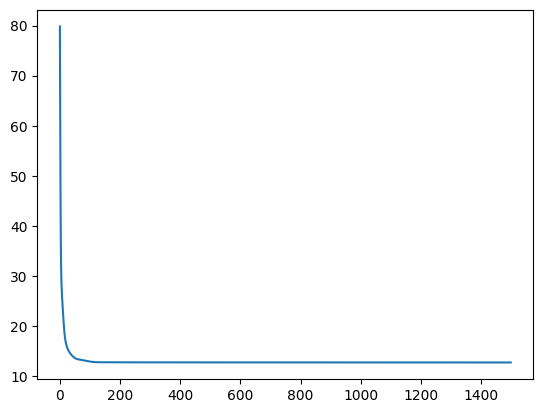

In [1077]:
# TRAINING
# (1) Split data
# (2) Preprocess data
# (3) Train regression model
# (4) Predict validation dataset's answer, calculate MAPE comparing to the ground truth
# (5) Make prediction of testing dataset and store the values in output_datalist
seed = 8126568
learning_rate = 3e-2
batch_size = 2500
split_ratio = 0.9
degree = 5
epoch = 15_0000

print(f"====={seed}_{learning_rate}_{batch_size}_{split_ratio}_{degree}_{epoch}=====")

preprocessed_training_datalist = PreprocessDataAdvance(training_datalist, drop=True, ignore_last=True)
training_data, validation_data = SplitDataAdvance(
    preprocessed_training_datalist, split_ratio, random_seed=seed
)

print(f"{training_data=}")

maep_record = []
least_maep_w, w = RegressionAdvance(
    training_data,
    maep_record,
    l_rate=learning_rate,
    epoch=epoch,
    degree=degree,
    batch_size=batch_size,
    random_sgd=False,
    random_seed=seed,
)
plt.plot(maep_record)

valid_pred = MakePredictionAdvance(w, validation_data[:, :-1], degree)
maep_val = round(maep(validation_data[:, -1], valid_pred), 10)
least_valid_pred = MakePredictionAdvance(least_maep_w, validation_data[:, :-1], degree)
least_maep_val = round(maep(validation_data[:, -1], least_valid_pred), 10)

print(f"FINAL: {w=}, {least_maep_w=}")

print(f"{valid_pred=}")
print(f"{validation_data[:, -1]=}")
print(f"{maep_val=}")

preprocessed_testing_datalist = PreprocessDataAdvance(testing_datalist)
output_datalist = MakePredictionAdvance(w, preprocessed_testing_datalist, degree)
least_output_datalist = MakePredictionAdvance(
    least_maep_w, preprocessed_testing_datalist, degree
)

output_datalist = np.array(output_datalist)
least_output_datalist = np.array(least_output_datalist)

# combination_name = f"__lastest__{seed}_{learning_rate}_{batch_size}_{split_ratio}_{degree}_{epoch}__{maep_val}.csv"
combination_name = ".csv"

# check = input()
# if not check:
#     continue

with open(
    output_dataroot_wo_file_ext + combination_name, "w", newline="", encoding="utf-8"
) as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Id", "gripForce"])
    for i in range(len(output_datalist)):
        writer.writerow([i, output_datalist[i]])

print("=============================================")
print(w)
print("=============================================")

# Save the Code File
Please save your code and submit it as an ipynb file! (**Lab1.ipynb**)